# GDP Analysis

In [441]:
#import the library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
pd.set_option('display.max_columns', 500)

In [442]:
#please change the path before running the file
path_0=(r"C:\Users\pdas0\Desktop\assignment\GDP\State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv")
#Getting the input file and using gdp as the dataframe name.
gdp = pd.read_csv(path_0)
gdp = pd.DataFrame(gdp) 
#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
gdp = gdp.drop(gdp[gdp['Duration'].isin(['2016-17'])].index)
#printing the first 5 rows of the dataframe.
gdp.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


***Calculating the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Comparing the calculated values and ploting them for the all states.***

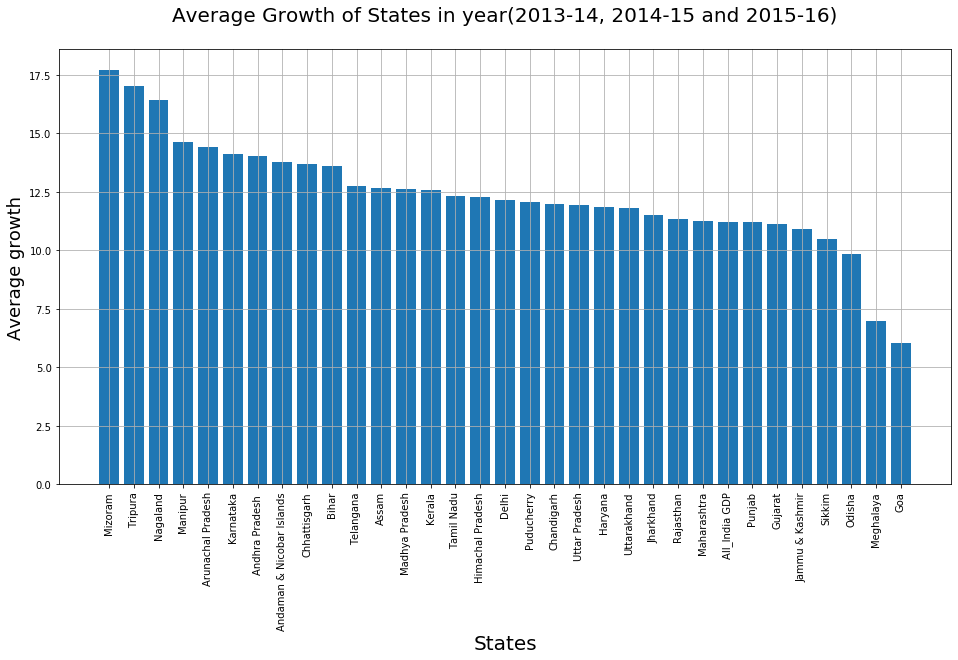

In [443]:
#selecing the for % Growth over previous year for duration 2013-14, 2014-15 and 2015-16 & calculating the average state-wise
m_gdp = gdp[(gdp['Items  Description']=='(% Growth over previous year)') & (gdp['Duration'].isin(['2013-14','2014-15','2015-16']))].mean()
m_gdp = pd.DataFrame(m_gdp)                              #converting series to dataframe
m_gdp = m_gdp.reset_index()                              #reseting the index
m_gdp.columns = ["State","Average"]                      #Assign the Column Names
m_gdp = m_gdp.sort_values('Average',ascending = False)   #sorting the data in descending order of Average

#Droping the NAN value before ploting the data to get a clear view in the graph
m_gdp = m_gdp.dropna()

#ploting the Bar graph
plt.figure(figsize=(16, 8))                                                               #setting the figure size
plt.bar(m_gdp["State"],m_gdp["Average"])                                                  #ploting the bar graph
plt.title("Average Growth of States in year(2013-14, 2014-15 and 2015-16)\n",fontsize=20) #printing the title of the graph
plt.grid(b=True, which='major',axis='both', linestyle='-')                                #making the grid lines
plt.xticks(rotation=90)                                                                   #rotating the labels of x -axis for better view
plt.xlabel("States",fontsize=20)                                                          #printing the label on x-axis
plt.ylabel("Average growth",fontsize=18)                                                  #printing the label on y-axis
plt.show()                                                                                #diplay the graph

***Note : Ignoring the Nan value in the above data as doing anything with the NaN in the data will miss lead the data, also zero  imputation mean thats the growth percentage for the state in a particular year is zero which is incorrect.
However I am droping the NaN after calucation of mean and before plotting the graph to get a clean view.***

***From the graph we can clear say that state that States such as Mizoram, Tripura, Nagaland has been consistently growing fast, Where as on the other hand Meghalaya and Goa are struggling very much.***

***Average Growth of Karnataka 14.12%  whereas the all India GDP is 11.2%***

***Ploting the total GDP of the states for the year 2015-16:***

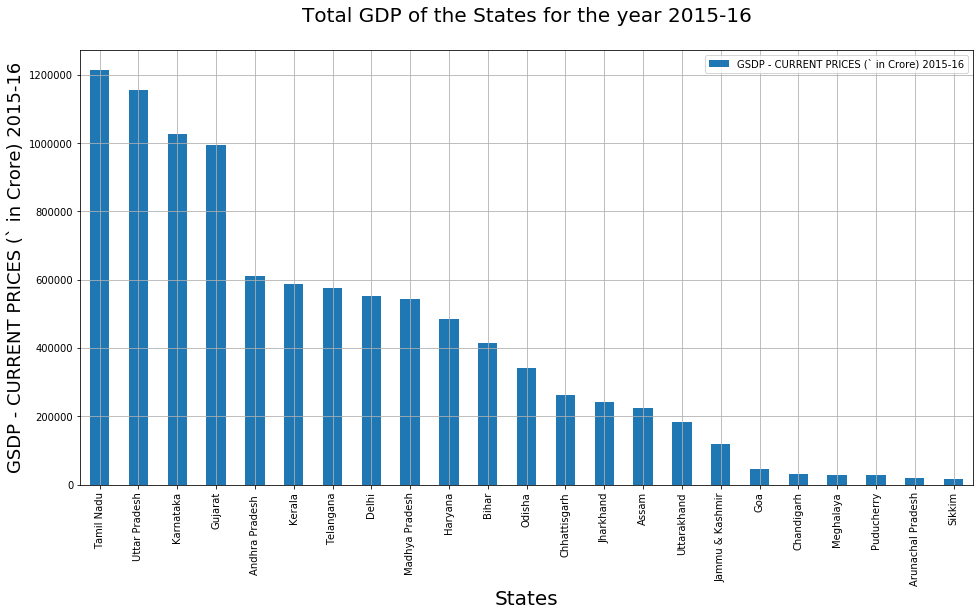

In [444]:
#Ploting the total GDP of the states for the year 2015-16:
m_gdp = gdp[(gdp['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)') & (gdp['Duration'].isin(['2015-16']))]
m_gdp = m_gdp.T                                                            #Transposing the data
new_header = m_gdp.iloc[1]                                                 #Select the first row for the header
m_gdp.columns = new_header                                                 #setting the columns
m_gdp = m_gdp[2:-1]                                                        #Select the data minus the header row
m_gdp = m_gdp.reset_index()                                                #reseting the index to maintain the order
m_gdp.columns = ["States","GSDP - CURRENT PRICES (` in Crore) 2015-16"]    #renaming the column names
m_gdp = m_gdp.sort_values('GSDP - CURRENT PRICES (` in Crore) 2015-16',ascending = False) #sortingin Ddescending order
m_gdp = m_gdp.dropna()

#ploting the bar graph
a = m_gdp.plot(x = 'States', y = 'GSDP - CURRENT PRICES (` in Crore) 2015-16',kind = 'bar',figsize =(16,8))
plt.title("Total GDP of the States for the year 2015-16\n",fontsize=20)
a.grid(b=True, which='major',axis='both', linestyle='-')
plt.xticks(rotation=90)
a.set_xlabel("States",fontsize=20)
a.set_ylabel("GSDP - CURRENT PRICES (` in Crore) 2015-16",fontsize=18)
plt.show()

***Identifying the top 5 and the bottom 5 states based on total GDP***

***Top 5 States:***

1. Tamil Nadu
2. Uttar Pradesh
3. Karnataka
4. Gujarat
5. Andhra Pradesh
    
***Bottom 5 States:***

1. Chandigarh
2. Meghalaya
3. Puducherry
4. Arunachal Pradesh
5. Sikkim

There is expontential decrease in the graph after Andhra Pradesh and the bottom States has very low GSDP.

***Note : Ignoring the Nan value in the above data as doing anything with the NaN in the data will miss lead the data, also zero imputation mean thats the growth percentage for the state in a particular year is zero which is incorrect.
However I am droping the NaN after calucation of mean and before plotting the graph to get a clean view.***

In [447]:
#Please change the path of the file before running the file
path=(r'C:\Users\pdas0\Desktop\assignment\GDP\Indian States')
all_files=glob.glob(path+'\\*csv')                                   #getting all the csv file
li = []                                                              #creating a empty list
for filename in all_files:                                           #using for loop for iterating the files 
    df = pd.read_csv(filename,encoding = 'unicode_escape')           #removing the unicode
    df=df[['Item','2014-15']]                                        #selecting the desired columns for analysis
    df['Item'] = df['Item'].apply(lambda x: x.split('*')[0])         #formating the Items rows to get rid of "*" and "**"
    df=df.T                                                          #transposing the data
    new_header = df.iloc[0]                                          #Selecting the column header
    df.columns = new_header                                          #renaming the columns
    df = df[1:]                                                      #selecting the start of the data
    df.loc[:,'States'] = filename.split('\\')[-1].split('-')[1]      #creating new column "States" from filename using split
    li.append(df)                                                    #appending to the empty list
df = pd.concat(li,axis = 0 , ignore_index = True,sort=False)         #concatenating in the dataframe
cols = list(df)                                                      #moving the "States" column to the start using index, pop and insert
cols.insert(0, cols.pop(cols.index('States')))
df = df.loc[:, cols]
df = df.drop(df[df['States'].isin(['Andaman_Nicobar_Islands','Delhi','Chandigarh','Puducherry'])].index) #droping the Union territories
df =df.reset_index()                                                 #reseting the index
df = df.drop(columns='index')                                        #droping the extra column
df.head()                                                            #printing the first 5 entires of dataframe

Item,States,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400,5076984,424228,2816000,94200,14900,780200,18700,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,287489,60421,56796,3625,35203,59,15467,0,0,109,0,19568,25207,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,4033091,2987155,2876251,110904,1194568,252509,507668,4502,26223,35739,10308,357619,543651,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,5984896,7448373,7081391,366982,3147173,462413,1572288,2228,13599,166600,10618,919427,1178022,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954
4,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,8238886,1535571,1414164,121407,871770,159176,386628,0,9507,5232,16675,294552,739057,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860


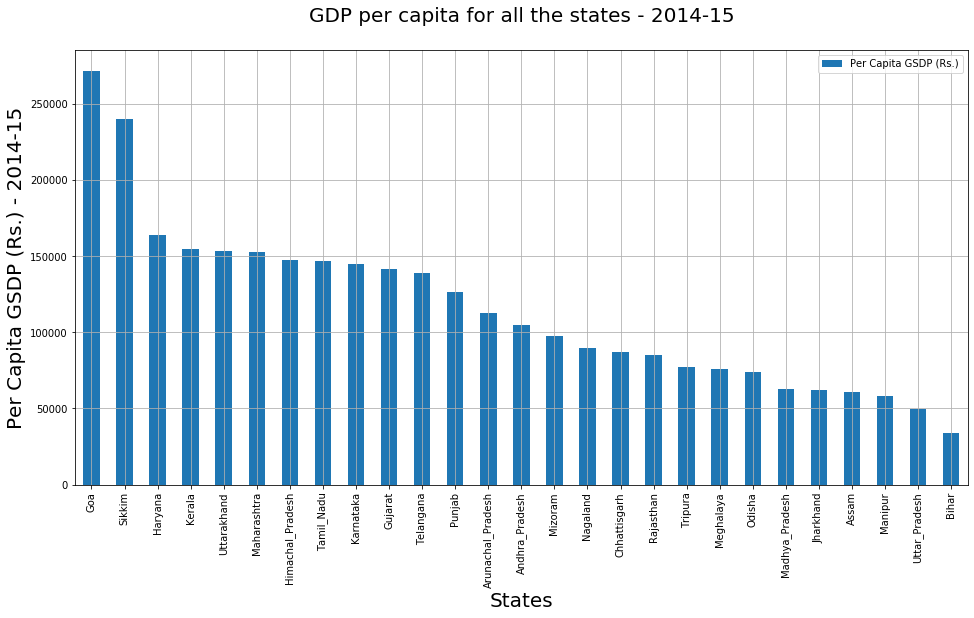

In [448]:
#Plot the GDP per capita for all the states.
df_1 = df.sort_values('Per Capita GSDP (Rs.)',ascending = False)   #sorting the data in descending order based on per capita      

#ploting the Bar graph 
d = df_1.plot(x = 'States', y = 'Per Capita GSDP (Rs.)',kind = 'bar',figsize =(16,8))
plt.title("GDP per capita for all the states - 2014-15\n",fontsize=20)
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xticks(rotation=90)
d.set_xlabel("States",fontsize=20)
d.set_ylabel("Per Capita GSDP (Rs.) - 2014-15",fontsize=20)
plt.show()

***Top 5 States:***

1. Goa
2. Sikkim
3. Haryana
4. Kerala
5. Uttarakhand
    
***Bottom 5 States: ***

1. Jharkhand
2. Assam
3. Manipur
4. Uttar_Pradesh
5. Bihar

Goa and Sikkim has a high marginal gap comapred to other States​


Bihar is struggling very hard in terms of per capita​

***The ratio of the highest per capita GDP to the lowest per capita GDP.***

In [449]:
Ratio = df_1['Per Capita GSDP (Rs.)'].max()//df_1['Per Capita GSDP (Rs.)'].min()    #calculating the ratio using floor division 
print("Ratio of the highest per capita GDP to the lowest per capita GDP : ",Ratio)  #printing the ratio

Ratio of the highest per capita GDP to the lowest per capita GDP :  8


***Ploting the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.***

In [450]:
#Creating New dataframe from the original dataframe and sorting it in descending order of Gross State Domestic Product
df_2 = df.sort_values('Gross State Domestic Product',ascending = False)

#Creating three columns and calculating the primary, secondary and tertiary percentage contribution on Gross State Domestic Product
df_2['% Primary'] = df_2['Primary']/df_2['Gross State Domestic Product']
df_2['% Secondary'] = df_2['Secondary']/df_2['Gross State Domestic Product']
df_2['% Tertiary'] = df_2['Tertiary']/df_2['Gross State Domestic Product']
df_2.head() #printing the top 5 contents of dataframe

Item,States,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),% Primary,% Secondary,% Tertiary
13,Maharashtra,16475655,10435121,3972829,1592564,475141,5282727,21758383,33660294,4334702,9450211,47445207,15839100,14286902,1552198,9697246,797933,4644123,223626,174188,1175023,131237,2551115,16143324,30718051,5426991,10806363,88631076,157834665,25394800,4017300,179212165,1172450,152853,0.121411,0.264743,0.494559
22,Tamil_Nadu,13064238,7297820,4693361,392705,680352,265536,13329774,18914794,1710379,12216718,32841892,12895842,11252588,1643253,7188320,468553,3660994,70414,180836,864407,39834,1903283,5598498,16830213,3400800,7430115,53343788,99515453,12507325,2766405,109256373,745760,146503,0.122005,0.300595,0.488244
26,Uttar_Pradesh,25097754,16215212,7096876,1404936,380730,901501,25999255,12261649,2030625,11256450,25548724,9437243,8476139,961104,7404509,1618742,3645747,681,36582,16323,171696,1914737,3392275,14548185,6152124,5034623,45968959,97516938,10107396,3287219,104337115,2109940,49450,0.249185,0.244867,0.440581
10,Karnataka,11219422,8157179,1868771,693082,500390,846882,12066304,12953843,1425762,6104799,20484404,8991658,7523720,1467938,5097652,259482,3194576,24152,171785,55349,42787,1349520,4094169,24766393,2232584,5308174,50490630,83041338,11026674,1889206,92178806,635100,145141,0.130901,0.222225,0.547747
6,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,3.30235e+07,1.01787e+07,1.01787e+07,NaN,4.55591e+06,511593,NaN,NaN,NaN,2.74416e+06,57634,1.24252e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,0.177505,0.368967,0.337648


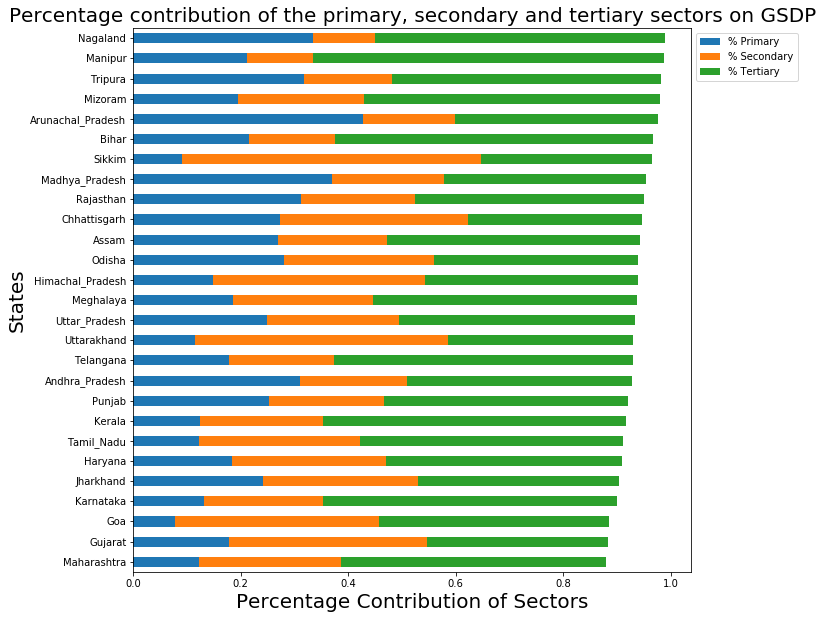

In [451]:
#creating a new column "Sum" for sorting purpose
df_2['% Sum'] = df_2[['% Primary','% Secondary','% Tertiary']].sum(axis=1)  #suming the %Contr. of primary,secondary & tertiary
df_2 = df_2.sort_values('% Sum')                                            #sorting in descending order

#creating new dataframe and selecting only the necessary column for ploting without tampering the original dataframe
df_3 = df_2[['States','% Primary','% Secondary','% Tertiary']]   

#ploting vertical stacked bar chart for better visualisation
per = df_3.plot.barh(x='States',stacked=True, figsize=(10,10))
plt.title('Percentage contribution of the primary, secondary and tertiary sectors on GSDP',fontsize=20)
plt.xlabel("Percentage Contribution of Sectors",fontsize=20)
plt.ylabel("States",fontsize=20)
per.legend(bbox_to_anchor=(1.0,1.0))                                   #ploting the legends outside the graph
plt.show()

***Conclusion***

Nagaland has highest percentage contribution compared to any other states in India.​

The main sectors involved in making the Nagaland highest is the mainly because of the Tertiary Sector, followed by its Primary Sector.​

Maharashtra is the lowest among all the States. The main reason is because of its Primary Sector Contribution.​

Sikkim has the highest contribution in the Secondary sector followed by Uttarakhand.​

***Categorising the states into four groups based on the GDP per capita (C1, C2, C3, C4,where C1 would have the highest per capita GDP and C4, the lowest) on the basis of quantile values are (0.20,0.5, 0.85, 1)***

In [452]:
#categorising the states into 4 category based on quantile values (0.20,0.5, 0.85, 1) using pd.qcut
df_1['Category'] = pd.qcut(df_1['Per Capita GSDP (Rs.)'],q= [0,.2,.5,.85,1], labels=["C4","C3","C2","C1"])
df_1.head()    #printing the top 5 in the dataframe

Item,States,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
5,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,1547536,380927,343492,37434,189656,15649,46171,17820,46359,19272,357,44028,233618,407099,346486,180431,1738217,3597882,527279,61854,4063307,14950,271793,C1
21,Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,845253,70568,64624,5945,47347,0,35283,0,0,0,0,12064,21079,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274,C1
7,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,1.25614e+07,4.98632e+06,4.81778e+06,168535,2.56062e+06,423873,1.45236e+06,NaN,NaN,190269,14459,479658,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,C1
11,Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,12070040,8557345,7763847,793498,4020934,147897,2761427,26956,125029,71567,3290,884767,2010306,7287633,2068915,5728645,29673778,48233259,5189352,822381,52600230,339843,154778,C1
25,Uttarakhand,1.60142e+06,866146,391188,339293,4796,244549,1.84597e+06,5.86625e+06,433880,1.34273e+06,7.64286e+06,1.74311e+06,1.53407e+06,209033,1.06669e+06,21295,307147,NaN,3889,-76,660,733778,385030,831307,579409,982430,5.58798e+06,1.50768e+07,1.43486e+06,313139,1.61985e+07,105820,153076,C2


In [453]:
#droping the sub-sub sectors and creating a new dataframe
df_4 = df_1.drop(["Crops",
"Livestock",
"Forestry and logging",
"Fishing and aquaculture",
"Primary",
"Secondary",
"Tertiary",
"Trade & repair services",
"Hotels & restaurants",
"Railways",
"Road transport",
"Water transport",
"Air transport",
"Services incidental to transport",\
"States",
"Storage",
"Communication & services related to broadcasting",
"TOTAL GSVA at basic prices",
"Taxes on Products",
"Subsidies on products",
"Population ('00)"],axis=1)
df_4.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Category
5,308507,3622,1177608,204110,165819,380927,189656,233618,407099,346486,180431,4063307,271793,C1
21,137447,1329,550697,212499,82058,70568,47347,21079,75330,119514,149265,1520933,240274,C1
7,8.01524e+06,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,4.37462e+07,164077,C1
11,5930617,558824,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,52600230,154778,C1
25,1.60142e+06,244549,5.86625e+06,433880,1.34273e+06,1.74311e+06,1.06669e+06,385030,831307,579409,982430,1.61985e+07,153076,C2


In [454]:
l = df_4.columns                                                #taking the dataframe columns in list and using it pivot table
df_4 = df_4.pivot_table(values = l,index='Category' ,aggfunc='sum')   #using pivot calculation the sum across each category
df_4.columns=df_4.columns.astype('str')                               #changing the datatype of columns to string
#using apply annd lambda calculating the % contibution of each category on GSDP
df_4 = df_4.apply(lambda x : x/df_4['Gross State Domestic Product'])  
df_4 = df_4.drop(['Gross State Domestic Product','Per Capita GSDP (Rs.)'],axis=1)  #droping the unnecessary columns
df_4

Item,"Agriculture, forestry and fishing",Construction,"Electricity, gas, water supply & other utility services",Financial services,Manufacturing,Mining and quarrying,Other services,Public administration,"Real estate, ownership of dwelling & professional services","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting"
Category,,,,,,,,,,,
C4,0.243235,0.097645,0.018479,0.032945,0.107125,0.026137,0.067991,0.057820,0.103654,0.117832,0.069418
C3,0.237275,0.088263,0.025874,0.032401,0.123834,0.060887,0.072010,0.044543,0.091164,0.096902,0.068729
C2,0.128260,0.069330,0.023574,0.061899,0.186221,0.017690,0.061826,0.031665,0.157102,0.104435,0.057556
C1,0.141192,0.110511,0.019631,0.038619,0.134982,0.005778,0.079073,0.035036,0.144610,0.137301,0.066894


***Finding the top sub-sectors that contribute to approximately 80% of the GSDP of each category.***

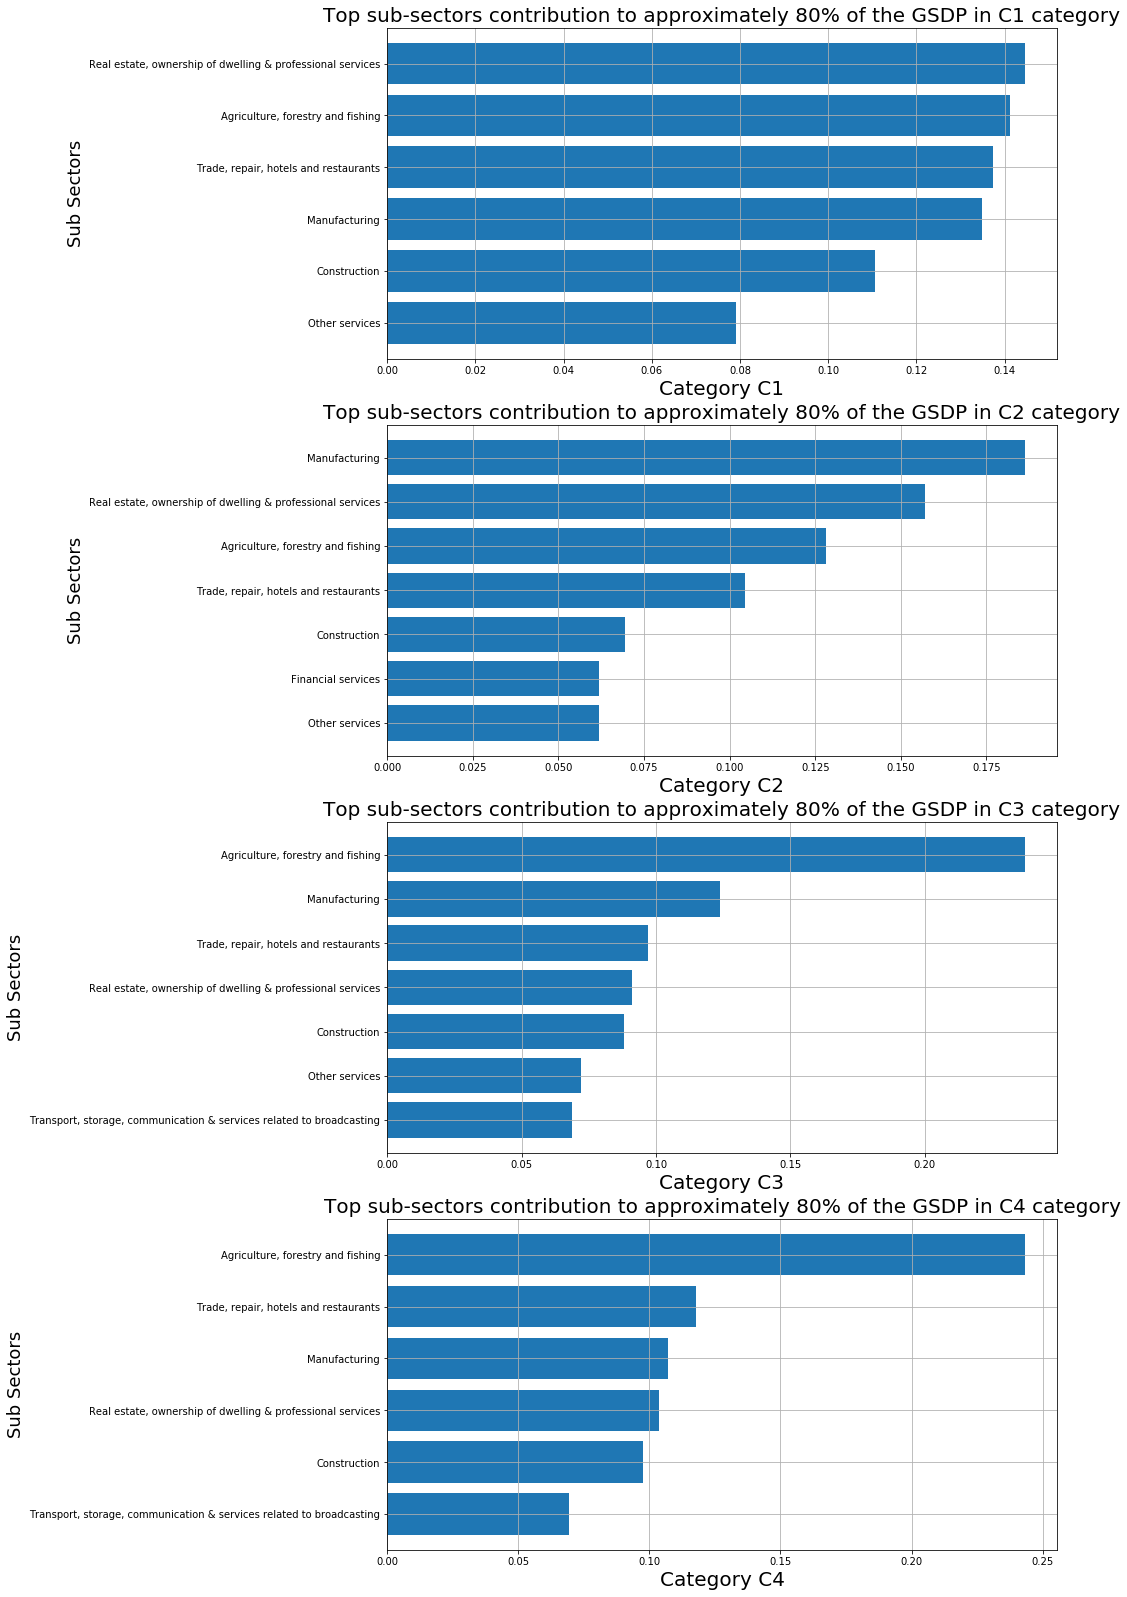

In [455]:
#creating subplot of top subsectors that contributes to 80% of the GSDP for each category.
plt.figure(figsize =(12,28))
plt.subplot(411)                                               #creating the first subplot
plt.title("Top sub-sectors contribution to approximately 80% of the GSDP in C1 category",fontsize=20)  #setting the title
df_C1 = pd.DataFrame(df_4.loc['C1'])                           #selecting the data of C1
df_C1 = df_C1.reset_index()                                    #reseting the index
df_C1 = df_C1.sort_values('C1',ascending = False)              #sorting in descending order
df_C1['Cumulative'] = df_C1['C1'].cumsum(axis=0)               #calculating the cummulative sum
df_C1=df_C1[df_C1['Cumulative']<=.8]                           #selecting the upto 80% contibution
df_C1 = df_C1.sort_values('C1')                                #sorting the C1 in descending order for vertical visualisation
#creating vertical bar chart for C1
plt.barh(df_C1['Item'],df_C1['C1'])                                              
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Category C1",fontsize=20)
plt.ylabel("Sub Sectors",fontsize=18)


plt.subplot(412)                                               #creating the second subplot
plt.title("\nTop sub-sectors contribution to approximately 80% of the GSDP in C2 category",fontsize=20)
df_C2 = pd.DataFrame(df_4.loc['C2'])
df_C2 = df_C2.reset_index()
df_C2 = df_C2.sort_values('C2',ascending = False)
df_C2['Cumulative'] = df_C2['C2'].cumsum(axis=0)
df_C2=df_C2[df_C2['Cumulative']<=.8]
df_C2 = df_C2.sort_values('C2')
#creating vertical bar chart for C2
plt.barh(df_C2['Item'],df_C2['C2'])
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Category C2",fontsize=20)
plt.ylabel("Sub Sectors",fontsize=18)

plt.subplot(413)                                                #creating the third subplot
plt.title("Top sub-sectors contribution to approximately 80% of the GSDP in C3 category",fontsize=20)
df_C3 = pd.DataFrame(df_4.loc['C3'])
df_C3 = df_C3.reset_index()
df_C3 = df_C3.sort_values('C3',ascending = False)
df_C3['Cumulative'] = df_C3['C3'].cumsum(axis=0)
df_C3=df_C3[df_C3['Cumulative']<=.8]
df_C3 = df_C3.sort_values('C3')
#creating vertical bar chart for C3
plt.barh(df_C3['Item'],df_C3['C3'])
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Category C3",fontsize=20)
plt.ylabel("Sub Sectors",fontsize=18)

plt.subplot(414)                                                 #creating the fourth subplot
plt.title("Top sub-sectors contribution to approximately 80% of the GSDP in C4 category",fontsize=20)
df_C4 = pd.DataFrame(df_4.loc['C4'])
df_C4 = df_C4.reset_index()
df_C4 = df_C4.sort_values('C4',ascending = False)
df_C4['Cumulative'] = df_C4['C4'].cumsum(axis=0)
df_C4=df_C4[df_C4['Cumulative']<=.8]
df_C4 = df_C4.sort_values('C4')
#creating vertical bar chart for C4
plt.barh(df_C4['Item'],df_C4['C4'])
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Category C4",fontsize=20)
plt.ylabel("Sub Sectors",fontsize=18)
plt.show()

***Hence from the above graph it is clear that in :***

***C1 category the sub sectors that contributes to 80% GSDP are as :***
1. Real estate, ownership of dwelling & professional services
2. Agriculture, forestry and fishing
3. Trade, repair, hotels and restaurants  
4. Manufacturing  
5. Construction  
6. Other services

***C2 category the sub sectors that contributes to 80% GSDP are as :***
1. Manufacturing  
2. Real estate, ownership of dwelling & professional services 
3. Agriculture, forestry and fishing  
4. Trade, repair, hotels and restaurants  
5. Construction  
6. Financial services  
7. Other services  

***C3 category the sub sectors that contributes to 80% GSDP are as :***
1. Agriculture, forestry and fishing  
2. Manufacturing  
3. Trade, repair, hotels and restaurants 
4. Real estate, ownership of dwelling & professional services 
5. Construction
6. Other services
7. Transport, storage, communication & services related to broadcasting 

***C4 category the sub sectors that contributes to 80% GSDP are as :***
1. Agriculture, forestry and fishing  
2. Trade, repair, hotels and restaurants  
3. Manufacturing
4. Real estate, ownership of dwelling & professional services  
5. Construction
6. Transport, storage, communication & services related to broadcasting

***Conclusion:***

Real estate, ownership of dwelling & professional services, Manufacturing are the sectors which contributes highest for the State in C1 & C2 categories .
On the other hand Agriculture, forestry and fishing contributes most in C3 & C4 categories.

***Ploting the contribution of the sub-sectors as a percentage of the GSDP of each category.***

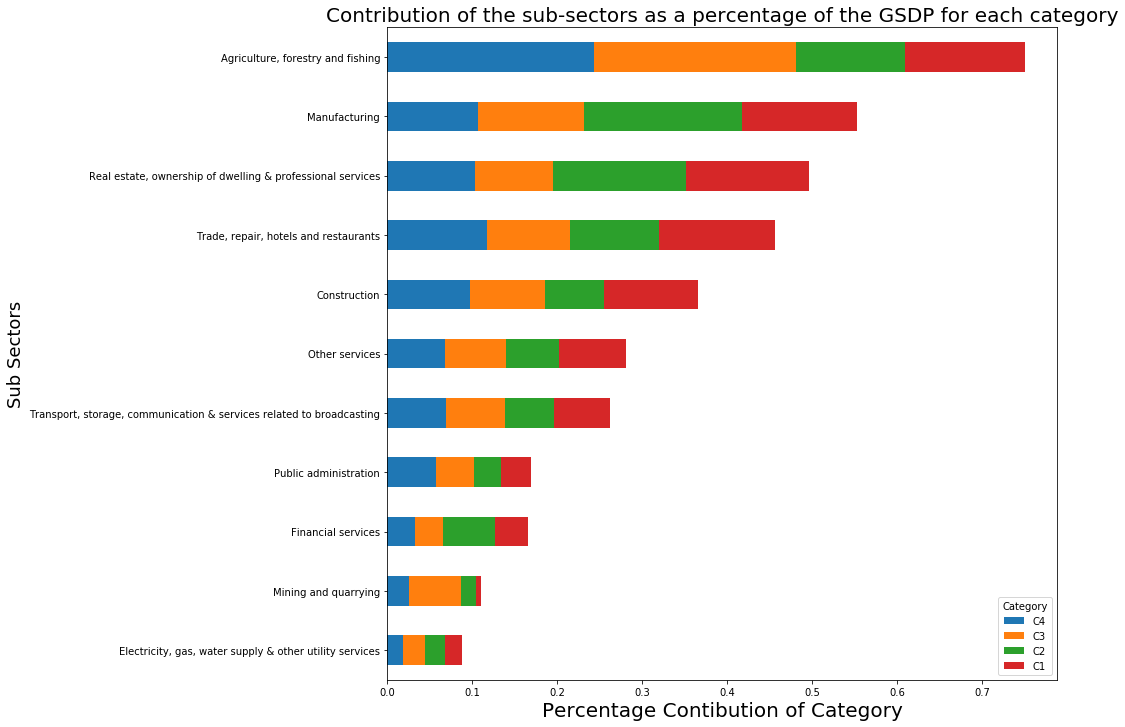

In [456]:
df_5 = df_4.T                                                  #transposing the data and storing it in a new dataframe
df_5.columns = df_5.columns.astype('str')                      #cahnging the datatype of columns
df_5 = df_5.reset_index()                                      #reseting the index
df_5['Sum'] = df_5.sum(axis=1)                                 #adding the sum of each sector category wise for sorting purpose
df_5 = df_5.sort_values('Sum')                                 #sorting the data in descending order

#ploting vertical stacked bar chart for better visualisation
df_5.plot.barh(x ='Item',y=['C4','C3','C2','C1'],stacked=True, figsize=(12,12))
plt.title("Contribution of the sub-sectors as a percentage of the GSDP for each category",fontsize=20)
plt.xlabel("Percentage Contibution of Category",fontsize=20)
plt.ylabel("Sub Sectors",fontsize=18)
plt.show()

***Conclusion***

1. In Sub sectors, Agriculture, forestry and fishing contribute highest as compared any other sectors​
​
2. The main contribution is because of C3 and C4 Categories of states lying below 50% of total GSDP contribute highest.​
​
3. The least contributing sub sector is the Electricity, gas, water supply & other utility services all the category contribute    almost same in this sector, although there is slightly greater contribution from C2 and C3 Category.​
​
4. In Mining and quarrying, highest contribution is made from C3 category State I.e. State lying below 50% of total GSDP and          negligible contribution from C1 category I.e. States lying above 80% of total GSDP.​

How does the GDP distribution of the top states (C1) differ from the others?

For the top States the % contribution is 30% in the top 5 Sub sectors  compared to others.

Which sub-sectors seem to be correlated with high GDP?

1. Agriculture, forestry and fishing  
2. Manufacturing  
3. Trade, repair, hotels and restaurants 
4. Real estate, ownership of dwelling & professional services 
5. Construction

Which sub-sectors do the various categories need to focus on? 

Mining and quarrying - C1,C2 and C4


Two recommendations for each category:

C1:

1. Mining and quarrying
2. Electricity, gas, water supply & other utility services

C2 :

1. Mining and quarrying
2. Public Admistration

C3:

1. Electricity, gas, water supply & other utility services
2. Financial Services

C4:

1. Mining and quarrying
2. Electricity, gas, water supply & other utility service

***Analysing the correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.***

In [457]:
#please change the path of the file before running the file
path_1=(r'C:\Users\pdas0\Desktop\assignment\GDP\State UT-wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv')
#reading the data
df_drop_out = pd.read_csv(path_1)
#renaming the columns names 
df_drop_out = df_drop_out.rename(columns={'Level of Education - State':'States','Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015'})
#droping the unnecessary columns
df_drop_out = pd.DataFrame(df_drop_out[['States','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']])
#printing the top data in the dataframe
df_drop_out.head()

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90


In [458]:
#Takig the data from part 1-B to get the per capita across each state and cearting new dataframe
m_per = df[['States','Per Capita GSDP (Rs.)']]
#transforming the data the state column to get rid of "_"
m_per.States = m_per.States.str.replace("_"," ")
#seting the index
m_per = m_per.set_index('States')
#renaming the data in states columns
m_per = m_per.rename(index={"Chhattisgarh":"Chhatisgarh","Uttarakhand":"Uttrakhand"})
#reseting the index
m_per = m_per.reset_index()
#printing the top 5 
m_per.head()

C:\Users\pdas0\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Item,States,Per Capita GSDP (Rs.)
0,Andhra Pradesh,104977
1,Arunachal Pradesh,112718
2,Assam,60621
3,Bihar,33954
4,Chhatisgarh,86860


In [459]:
#merging the two dataframe
m_drop_out = pd.merge(df_drop_out,m_per,how='inner',on='States')
#changing the datatype to int
m_drop_out['Per Capita GSDP (Rs.)'] = m_drop_out['Per Capita GSDP (Rs.)'].astype(int)
#sorting the data in descending order 
m_drop_out = m_drop_out.sort_values('Per Capita GSDP (Rs.)',ascending =False)
#printing the top 5
m_drop_out.head()

,States,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
5,Goa,0.73,0.07,11.15,271793
21,Sikkim,2.27,1.57,15.89,240274
7,Haryana,5.61,5.81,15.89,164077
11,Kerala,NaN,NaN,12.32,154778
26,Uttrakhand,4.04,1.19,10.40,153076


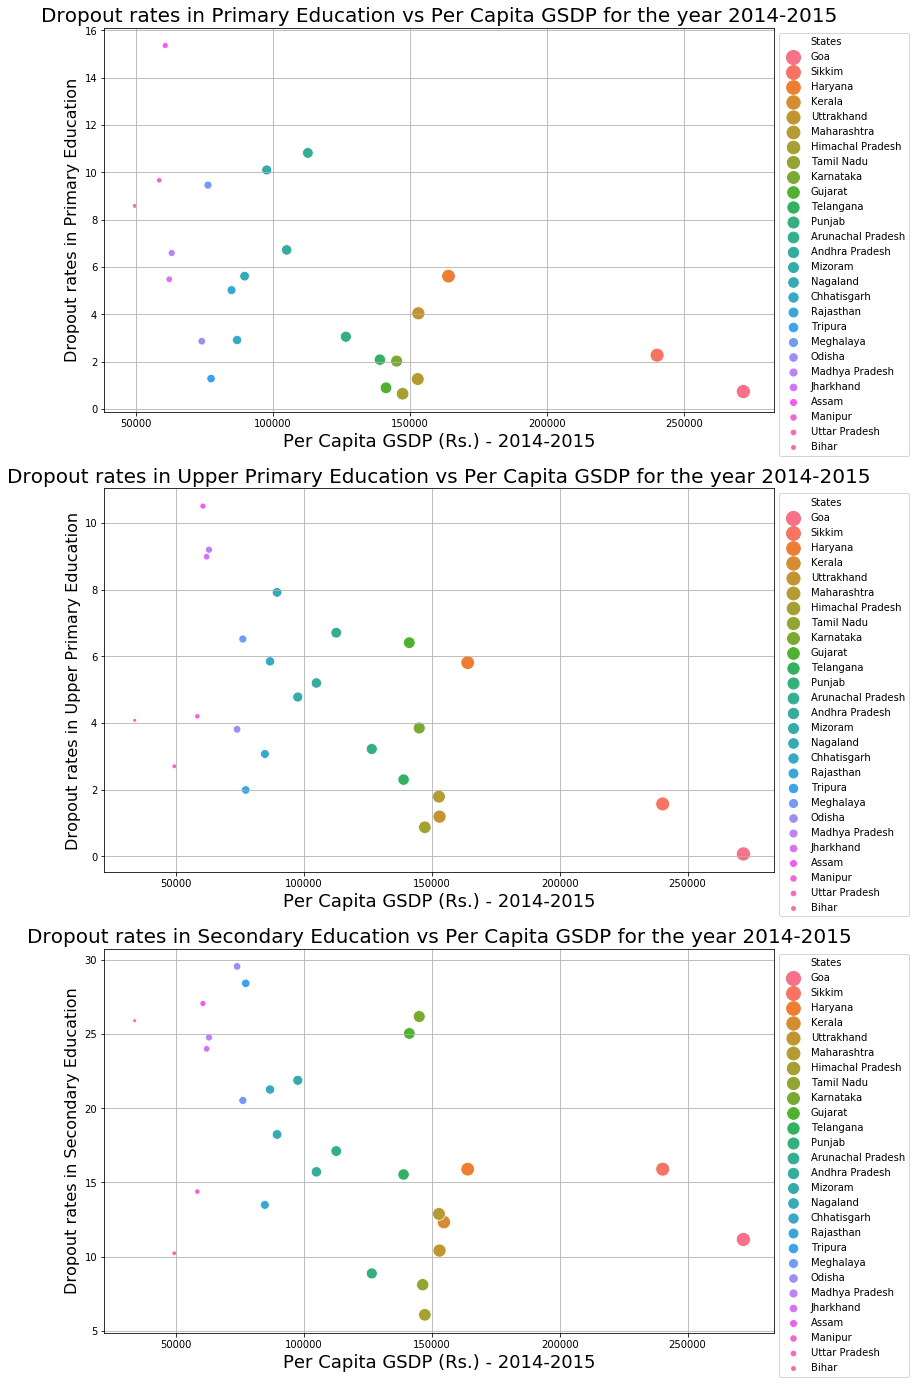

In [460]:
#using seaborn plotting scatter plot to get the correlation
plt.figure(figsize =(12,24))
#creating the subplot for dropouts in primary education
plt.subplot(311)
plt.title("Dropout rates in Primary Education vs Per Capita GSDP for the year 2014-2015",fontsize=20)
#plotting the scatter plot
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Primary - 2014-2015',hue='States',size='States',sizes=(15,200),data=m_drop_out)
#placing the legends
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Per Capita GSDP (Rs.) - 2014-2015",fontsize=18)
plt.ylabel("Dropout rates in Primary Education",fontsize=16)


plt.subplot(312)
#creating the subplot for dropouts in upper primary education
plt.title("Dropout rates in Upper Primary Education vs Per Capita GSDP for the year 2014-2015",fontsize=20)
#plotting the scatter plot
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Upper Primary - 2014-2015',hue='States',size='States',sizes=(15,200),data=m_drop_out)
#placing the legends
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Per Capita GSDP (Rs.) - 2014-2015",fontsize=18)
plt.ylabel("Dropout rates in Upper Primary Education",fontsize=16)

plt.subplot(313)
#creating the subplot for dropouts in secondary education
plt.title("Dropout rates in Secondary Education vs Per Capita GSDP for the year 2014-2015",fontsize=20)
#plotting the scatter plot
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Secondary - 2014-2015',hue='States',size='States',sizes=(15,200),data=m_drop_out)
#placing the legends
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.grid(b=True, which='major',axis='both', linestyle='-')
plt.xlabel("Per Capita GSDP (Rs.) - 2014-2015",fontsize=18)
plt.ylabel("Dropout rates in Secondary Education",fontsize=16)
#displaying the graph
plt.show()

**CONCLUSION**

***Primary Education***
1. In Primary Education, the dropout rate tends to be lower for States having higher Per Capita in the year 2014-15.​
​
2. Goa being the highest Per Capita doesn't has the second lowest dropout rate compared to any other States​
​
4. The lowest dropout rate is for the State Himachal Pradesh​

***Upper Primary Education***
1. In Upper Primary Education, the dropout rate is lower for some States having higher Per Capita in the year 2014-15.​
​
2. Goa being the highest Per Capita has the second lowest dropout rate compared to any other States​
​
3. The highest dropout rate is for the State Assam, but in terms of per capita it stand at the bottom 4th not the last.​
​


***Secondary Education***
1. In Secondary Education, the dropout rate is not lower for States (like Goa and Sikkim) having highest Per Capita in the year 2014-15.​
​
2. Goa being the highest Per Capita has 11.15% compared to other States.​
​
3. The highest dropout rate is for the State Odisha, but in terms of per capita it stand at the bottom 7th not the last.​
​


***END***